Question:
What stats impact a player's overall the greatest, depending on position?
Is Fifa's rating system consistent? How well can we guess the rating of a player based on individual stats?

Further:
How well can we predict a player's rating in the next fifa given data from the current?

In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import dataset
fifa22 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA22_official_data.csv")
fifa21 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA21_official_data.csv")
fifa20 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA20_official_data.csv")
fifa19 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA19_official_data.csv")
fifa18 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA18_official_data.csv")

In [3]:
fifa22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [4]:
fifa22.at[5, "Best Position"]

'CDM'

In [5]:
fifa22.at[5, "Work Rate"]

'High/ Medium'

In [6]:
fifa22.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [7]:
fifa21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

For Our first two questions, we will purely be looking at data from fifa 22, as that is the most recent with fully available data.

What stats impact a player's overall the greatest, depending on position?

Here we will only be considering players' individual and overall stats.

In [8]:
fifa_22_stats = fifa22.copy()

In [9]:
fifa_22_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [10]:
for col in fifa_22_stats.columns:
    print(col + ": " + str(fifa_22_stats[col].nunique()))

ID: 16710
Name: 16089
Age: 30
Photo: 16710
Nationality: 168
Flag: 168
Overall: 50
Potential: 48
Club: 869
Club Logo: 918
Value: 254
Wage: 134
Special: 1394
Preferred Foot: 2
International Reputation: 5
Weak Foot: 5
Skill Moves: 5
Work Rate: 10
Body Type: 10
Real Face: 2
Position: 29
Jersey Number: 99
Joined: 1975
Loaned From: 342
Contract Valid Until: 56
Height: 50
Weight: 58
Crossing: 87
Finishing: 93
HeadingAccuracy: 88
ShortPassing: 85
Volleys: 87
Dribbling: 91
Curve: 89
FKAccuracy: 91
LongPassing: 84
BallControl: 88
Acceleration: 84
SprintSpeed: 83
Agility: 79
Reactions: 67
Balance: 78
ShotPower: 82
Jumping: 72
Stamina: 85
Strength: 78
LongShots: 90
Aggression: 85
Interceptions: 89
Positioning: 94
Vision: 85
Penalties: 89
Composure: 83
Marking: 83
StandingTackle: 87
SlidingTackle: 88
GKDiving: 71
GKHandling: 75
GKKicking: 78
GKPositioning: 81
GKReflexes: 74
Best Position: 15
Best Overall Rating: 51
Release Clause: 1170
DefensiveAwareness: 90


In [11]:
print(fifa_22_stats["Position"].unique())

['<span class="pos pos18">CAM' '<span class="pos pos11">LDM'
 '<span class="pos pos24">RS' '<span class="pos pos13">RCM'
 '<span class="pos pos7">LB' '<span class="pos pos9">RDM'
 '<span class="pos pos15">LCM' '<span class="pos pos28">SUB'
 '<span class="pos pos26">LS' '<span class="pos pos12">RM'
 '<span class="pos pos6">LCB' '<span class="pos pos16">LM'
 '<span class="pos pos3">RB' '<span class="pos pos10">CDM'
 '<span class="pos pos23">RW' '<span class="pos pos27">LW'
 '<span class="pos pos25">ST' '<span class="pos pos14">CM'
 '<span class="pos pos20">RF' '<span class="pos pos8">LWB'
 '<span class="pos pos17">RAM' '<span class="pos pos21">CF'
 '<span class="pos pos29">RES' '<span class="pos pos22">LF'
 '<span class="pos pos2">RWB' '<span class="pos pos5">CB'
 '<span class="pos pos4">RCB' nan '<span class="pos pos19">LAM'
 '<span class="pos pos0">GK']


There are some positions we may want to simplify, but we will come back to this later.
e.g. lb/rb to full_back, lf/rf to cf, etc...

For now lets use some one-hot encoding, and other manual cleaning to make our data more machine friendly

In [12]:
pos = fifa_22_stats.at[1, "Position"]
print(type(pos))
print(pos)

<class 'str'>
<span class="pos pos11">LDM


In [13]:
#We can use regex to remove the html tags from position
fifa_22_stats['Position'] = fifa_22_stats['Position'].str.extract(r'>(\w+)$')

In [14]:
fifa_22_SUBs = fifa_22_stats[(fifa_22_stats['Position'] == 'SUB')].copy()
#fifa_22_SUBs.drop(columns=["Position", "ID"], inplace=True)

fifa_22_SUBs.shape

(7192, 65)

In [15]:
#fifa_22_SUB_full = fifa22[(fifa_22_stats['Position'] == '<span class="pos pos28">SUB')].copy()
fifa_22_SUBs.sort_values(by="Overall", ascending=False).head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
220,202652,R. Sterling,26,https://cdn.sofifa.com/players/202/652/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,88,89,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,47.0,15.0,12.0,12.0,15.0,9.0,LW,88.0,€206.9M,47.0
14087,193041,K. Navas,34,https://cdn.sofifa.com/players/193/041/22_60.png,Costa Rica,https://cdn.sofifa.com/flags/cr.png,88,88,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,14.0,89.0,84.0,75.0,87.0,89.0,GK,88.0,€28.7M,28.0
76,183898,A. Di María,33,https://cdn.sofifa.com/players/183/898/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,87,87,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,52.0,10.0,7.0,11.0,12.0,11.0,RW,87.0,€91.6M,41.0
1228,213345,K. Coman,25,https://cdn.sofifa.com/players/213/345/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,86,87,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,21.0,5.0,3.0,5.0,3.0,5.0,LM,86.0,€139.7M,29.0
244,10535,15 Xavi,34,https://cdn.sofifa.com/players/010/535/15_60.png,Spain,https://cdn.sofifa.com/flags/es.png,86,86,FC Barcelona,https://cdn.sofifa.com/teams/241/30.png,...,59.0,5.0,15.0,12.0,5.0,9.0,CAM,85.0,NaN,NaN


In [16]:
print(fifa_22_SUBs.at[220, "Best Position"])
print(fifa_22_SUBs.at[220, "Best Overall Rating"])

LW
88.0


In [17]:
fifa_22_stats.loc[fifa_22_stats['Position'] == "SUB", 'Overall'] = fifa_22_stats.loc[fifa_22_stats['Position'] == "SUB", 'Best Overall Rating']
fifa_22_stats.loc[fifa_22_stats['Position'] == "SUB", 'Position'] = fifa_22_stats.loc[fifa_22_stats['Position'] == "SUB", 'Best Position']


In [18]:
print(fifa_22_stats.at[220, "Position"])

LW


In [19]:
fifa_22_stats[(fifa_22_stats['Position'] == 'SUB')].shape

(0, 65)

In [20]:
fifa_22_stats.drop(columns=["Name", "Age", "Photo", "Nationality", "Flag", "Potential", "Club", "Club Logo", "Value", "Wage", "Special", "International Reputation", "Body Type", "Real Face", "Jersey Number", "Joined", "Loaned From", "Contract Valid Until", "Height", "Weight", "Best Position", "Best Overall Rating", "Release Clause"], inplace=True)

In [21]:

one_hot_encoded_foot = pd.get_dummies(fifa_22_stats['Preferred Foot'])
fifa_22_stats = pd.concat([fifa_22_stats, one_hot_encoded_foot], axis=1)
fifa_22_stats.drop(columns=["Preferred Foot"], inplace=True)


In [22]:
fifa_22_stats.drop(columns=["Marking"], inplace=True)

In [23]:
fifa_22_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  16710 non-null  int64  
 1   Overall             16710 non-null  int64  
 2   Weak Foot           16710 non-null  float64
 3   Skill Moves         16710 non-null  float64
 4   Work Rate           16710 non-null  object 
 5   Position            16684 non-null  object 
 6   Crossing            16710 non-null  float64
 7   Finishing           16710 non-null  float64
 8   HeadingAccuracy     16710 non-null  float64
 9   ShortPassing        16710 non-null  float64
 10  Volleys             16673 non-null  float64
 11  Dribbling           16710 non-null  float64
 12  Curve               16673 non-null  float64
 13  FKAccuracy          16710 non-null  float64
 14  LongPassing         16710 non-null  float64
 15  BallControl         16710 non-null  float64
 16  Acce

In [24]:
#Lets Sort our work rates:
#Split into two columns, attacking and defesive
#Replace low/med/high with 0/1/2


fifa_22_stats['Att Work Rate'] = fifa_22_stats['Work Rate'].str.extract(r'^(\w+)/')
fifa_22_stats['Def Work Rate'] = fifa_22_stats['Work Rate'].str.extract(r'/ (\w+)$')

fifa_22_stats.drop(columns=["Work Rate"], inplace=True)


In [25]:

fifa_22_stats['Att Work Rate'] = fifa_22_stats['Att Work Rate'].replace({'High': 2, 'Medium': 1, 'Low': 0})
fifa_22_stats['Def Work Rate'] = fifa_22_stats['Def Work Rate'].replace({'High': 2, 'Medium': 1, 'Low': 0})

#Some non int conforming values turned to nan
fifa_22_stats['Att Work Rate'] = pd.to_numeric(fifa_22_stats['Att Work Rate'], errors='coerce').astype('Int64')
fifa_22_stats['Def Work Rate'] = pd.to_numeric(fifa_22_stats['Def Work Rate'], errors='coerce').astype('Int64')

In [26]:
fifa_22_stats.head(5)

,ID,Overall,Weak Foot,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Left,Right,Att Work Rate,Def Work Rate
0,212198,88,3.0,4.0,CAM,87.0,83.0,64.0,91.0,87.0,...,12.0,14.0,15.0,8.0,14.0,72.0,False,True,2,2
1,209658,87,4.0,3.0,LDM,75.0,82.0,86.0,86.0,69.0,...,13.0,8.0,15.0,11.0,9.0,74.0,False,True,2,1
2,176580,88,4.0,3.0,RS,80.0,93.0,84.0,83.0,90.0,...,27.0,25.0,31.0,33.0,37.0,42.0,False,True,2,1
3,192985,91,5.0,4.0,RCM,94.0,82.0,55.0,94.0,82.0,...,15.0,13.0,5.0,10.0,13.0,68.0,False,True,2,2
4,224334,84,3.0,4.0,LB,87.0,66.0,58.0,82.0,68.0,...,8.0,14.0,13.0,13.0,14.0,80.0,True,False,2,2


In [27]:
fifa_22_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  16710 non-null  int64  
 1   Overall             16710 non-null  int64  
 2   Weak Foot           16710 non-null  float64
 3   Skill Moves         16710 non-null  float64
 4   Position            16684 non-null  object 
 5   Crossing            16710 non-null  float64
 6   Finishing           16710 non-null  float64
 7   HeadingAccuracy     16710 non-null  float64
 8   ShortPassing        16710 non-null  float64
 9   Volleys             16673 non-null  float64
 10  Dribbling           16710 non-null  float64
 11  Curve               16673 non-null  float64
 12  FKAccuracy          16710 non-null  float64
 13  LongPassing         16710 non-null  float64
 14  BallControl         16710 non-null  float64
 15  Acceleration        16710 non-null  float64
 16  Spri

Great, now that our dataset is fully numerical lets have a look at some correlations.

In [28]:
fifa_22_stats.dropna(inplace=True)

# Correlations

In [29]:
one_hot_encoded_pos = pd.get_dummies(fifa_22_stats['Position'])
positions_one_hot = pd.concat([fifa_22_stats, one_hot_encoded_pos], axis=1)
positions_one_hot.drop(columns=["Position"], inplace=True)


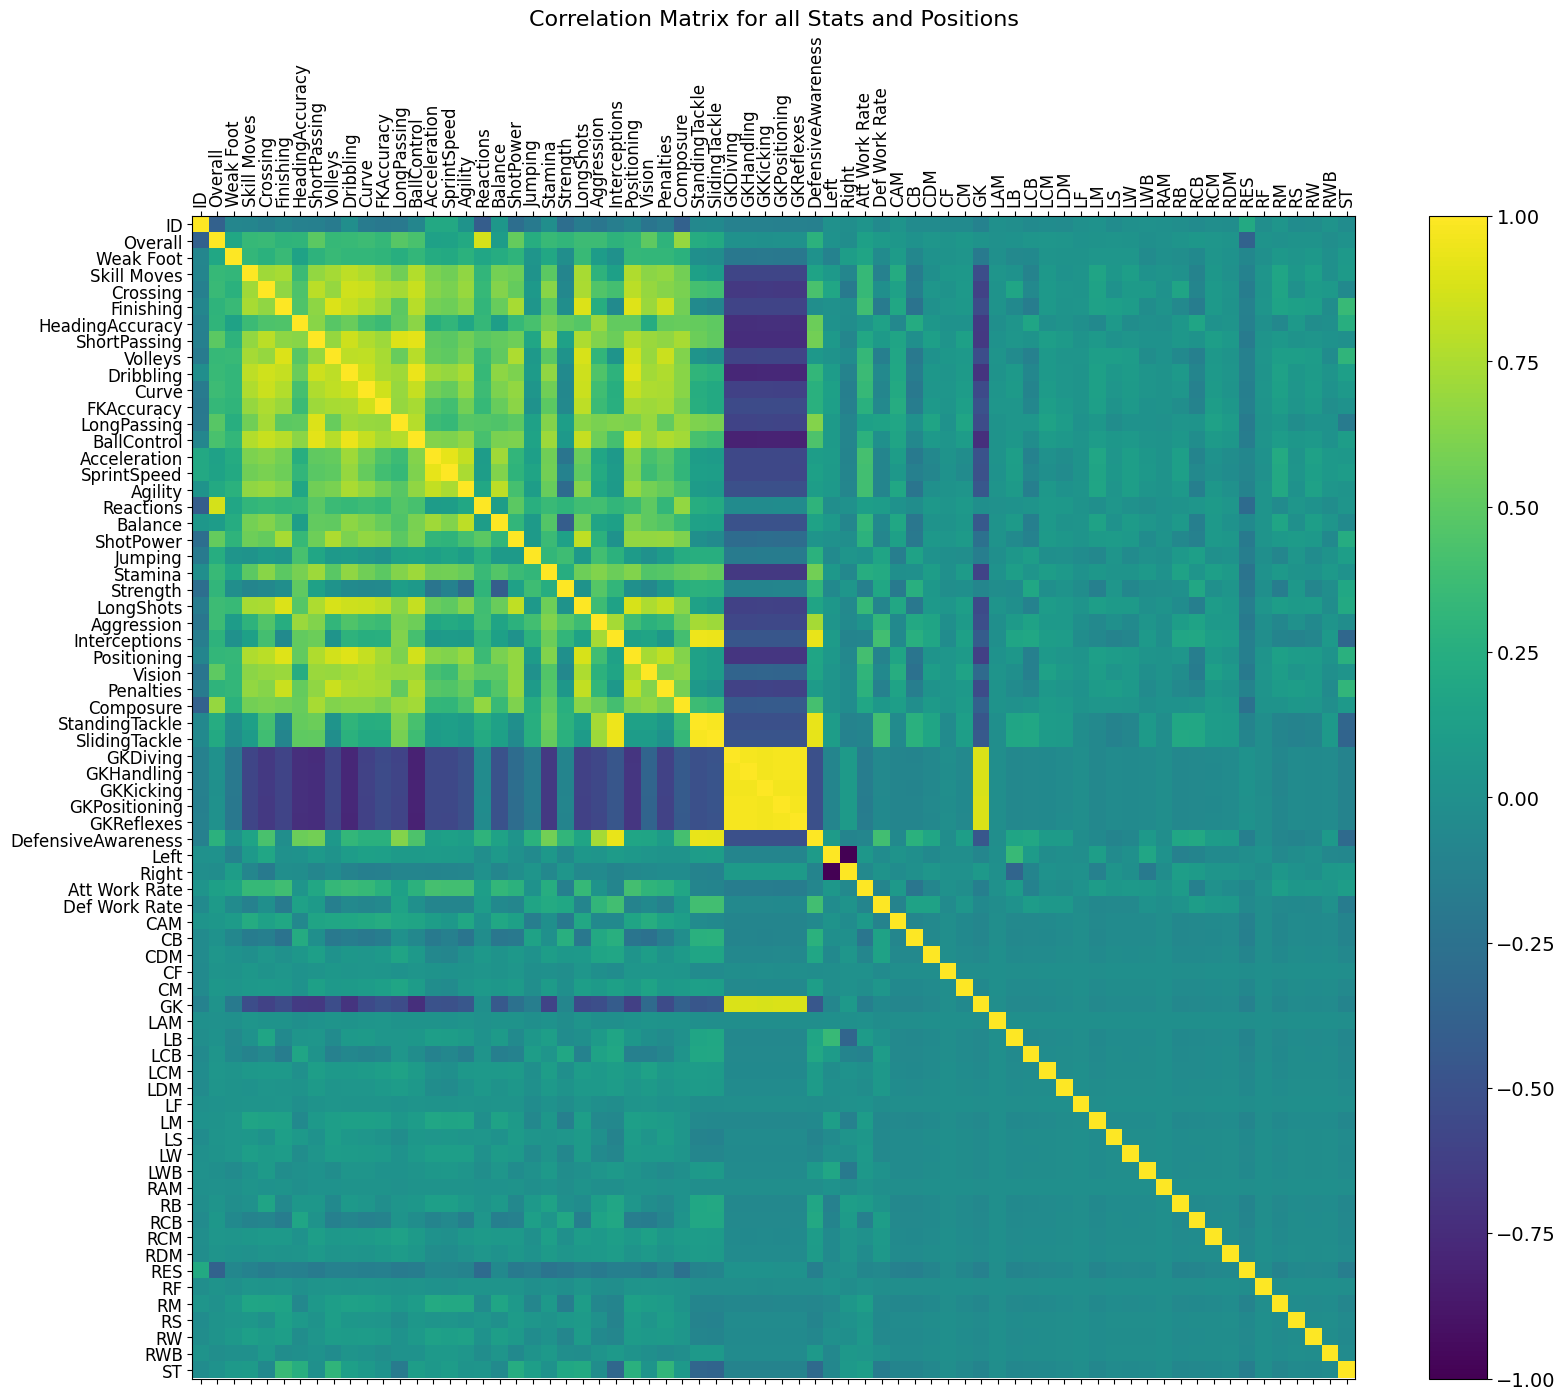

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(positions_one_hot.corr(), fignum=f.number)
plt.xticks(range(positions_one_hot.shape[1]), positions_one_hot.columns, fontsize=12, rotation=90)
plt.yticks(range(positions_one_hot.shape[1]), positions_one_hot.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for all Stats and Positions', fontsize=16);

Idea, why dont we split this up into multiple different smaller datasets for each position.
We can also simplify positions into:
-St
-Cf
-Winger/Wide Mid
-Cam
-Cm
-Cdm
-Full Backs
-Cbs
-Gk

## Strikers

In [31]:
fifa_22_strikers = fifa_22_stats[(fifa_22_stats['Position'] == 'ST') | (fifa_22_stats['Position'] == 'LT') | (fifa_22_stats['Position'] == 'RT')].copy()

In [32]:
fifa_22_strikers.drop(columns=["Position", "ID"], inplace=True)
fifa_22_strikers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 33 to 15586
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Overall             1600 non-null   int64  
 1   Weak Foot           1600 non-null   float64
 2   Skill Moves         1600 non-null   float64
 3   Crossing            1600 non-null   float64
 4   Finishing           1600 non-null   float64
 5   HeadingAccuracy     1600 non-null   float64
 6   ShortPassing        1600 non-null   float64
 7   Volleys             1600 non-null   float64
 8   Dribbling           1600 non-null   float64
 9   Curve               1600 non-null   float64
 10  FKAccuracy          1600 non-null   float64
 11  LongPassing         1600 non-null   float64
 12  BallControl         1600 non-null   float64
 13  Acceleration        1600 non-null   float64
 14  SprintSpeed         1600 non-null   float64
 15  Agility             1600 non-null   float64
 16  Reactions

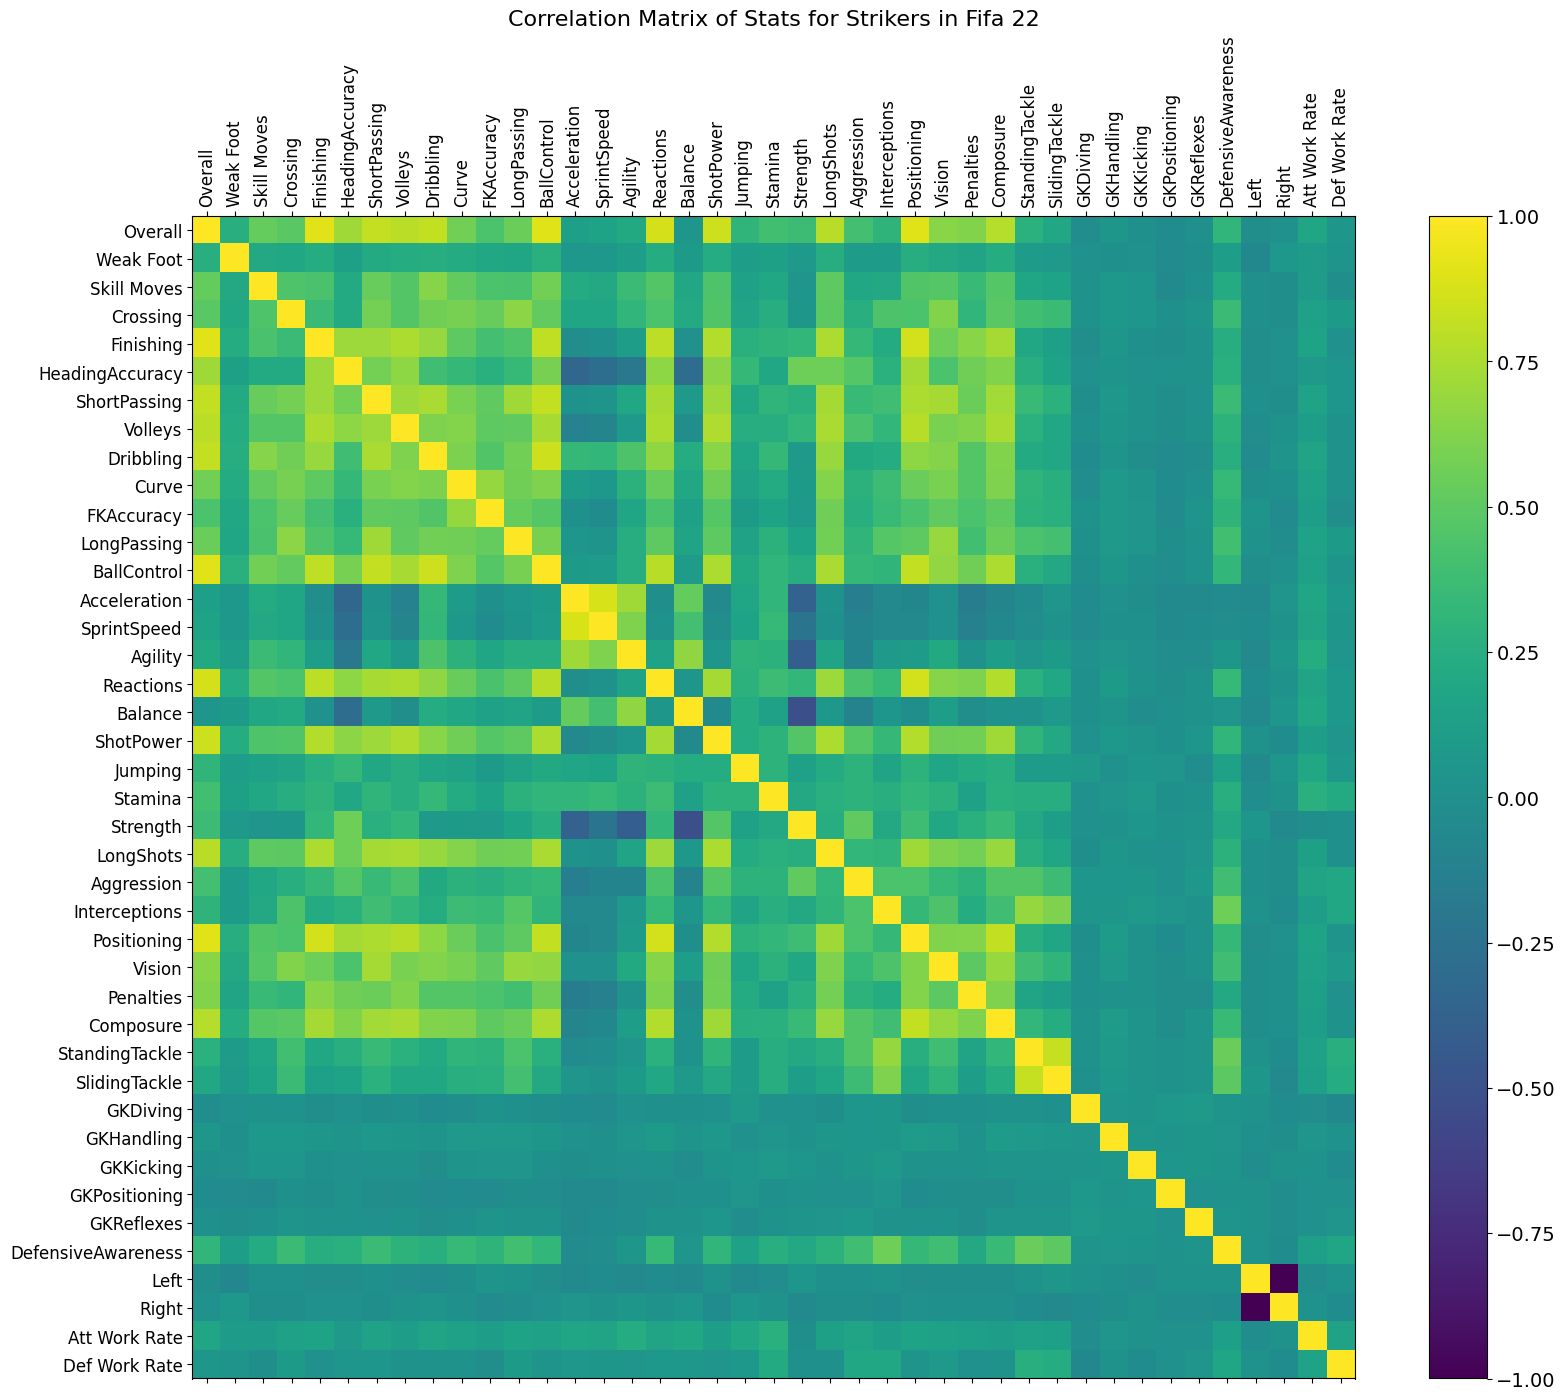

In [33]:
f = plt.figure(figsize=(19, 15))
plt.matshow(fifa_22_strikers.corr(), fignum=f.number)
plt.xticks(range(fifa_22_strikers.shape[1]), fifa_22_strikers.columns, fontsize=12, rotation=90)
plt.yticks(range(fifa_22_strikers.shape[1]), fifa_22_strikers.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Stats for Strikers in Fifa 22', fontsize=16);

In [34]:
#Lets Purely Look at correlation with overall for strikers now

correlation_st = fifa_22_strikers.corr()['Overall']

# Print correlation coefficients
print(correlation_st)

Overall               1.000000
Weak Foot             0.264988
Skill Moves           0.525854
Crossing              0.488855
Finishing             0.911079
HeadingAccuracy       0.716134
ShortPassing          0.819240
Volleys               0.789731
Dribbling             0.812782
Curve                 0.578083
FKAccuracy            0.434877
LongPassing           0.551476
BallControl           0.899399
Acceleration          0.129295
SprintSpeed           0.162866
Agility               0.217934
Reactions             0.868021
Balance               0.054040
ShotPower             0.848487
Jumping               0.305276
Stamina               0.392608
Strength              0.370428
LongShots             0.788081
Aggression            0.405859
Interceptions         0.300300
Positioning           0.899408
Vision                0.647569
Penalties             0.617478
Composure             0.779961
StandingTackle        0.279519
SlidingTackle         0.202696
GKDiving             -0.019694
GKHandli

In [35]:
print(fifa_22_strikers.shape)

(1600, 41)


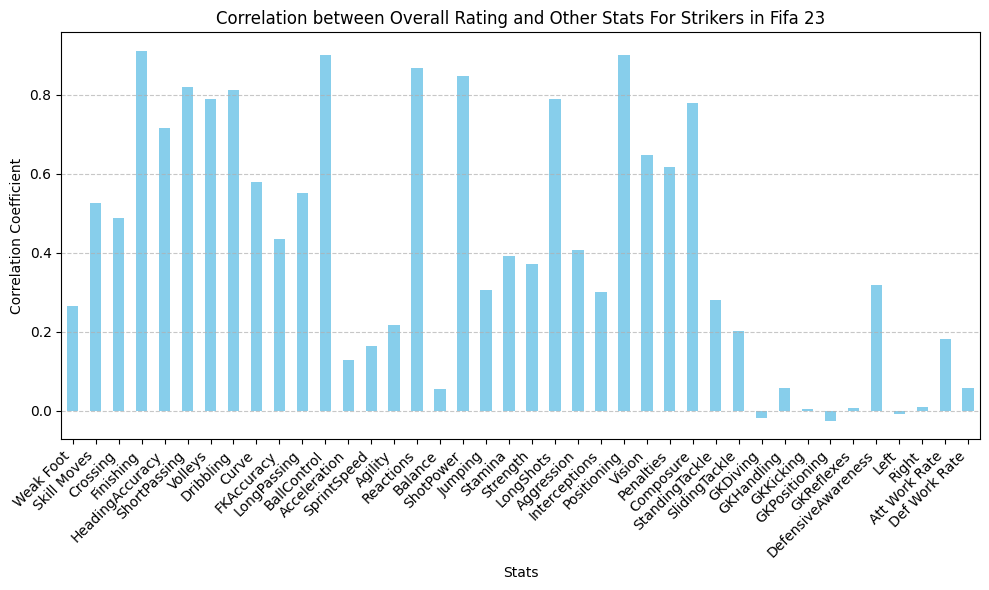

In [36]:
plt.figure(figsize=(10, 6))
correlation_st.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Strikers in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
correlation_st.drop('Overall').nlargest(10)

Finishing       0.911079
Positioning     0.899408
BallControl     0.899399
Reactions       0.868021
ShotPower       0.848487
ShortPassing    0.819240
Dribbling       0.812782
Volleys         0.789731
LongShots       0.788081
Composure       0.779961
Name: Overall, dtype: float64

Interesting. This aligns roughly with what I would have expected, however thought I would have seen some stats in there like heading accuracy, or other physical stats considering these are often of great importance for strikers.

Let's repeat this for the rest of the positions we set out.

## Centre Forwards

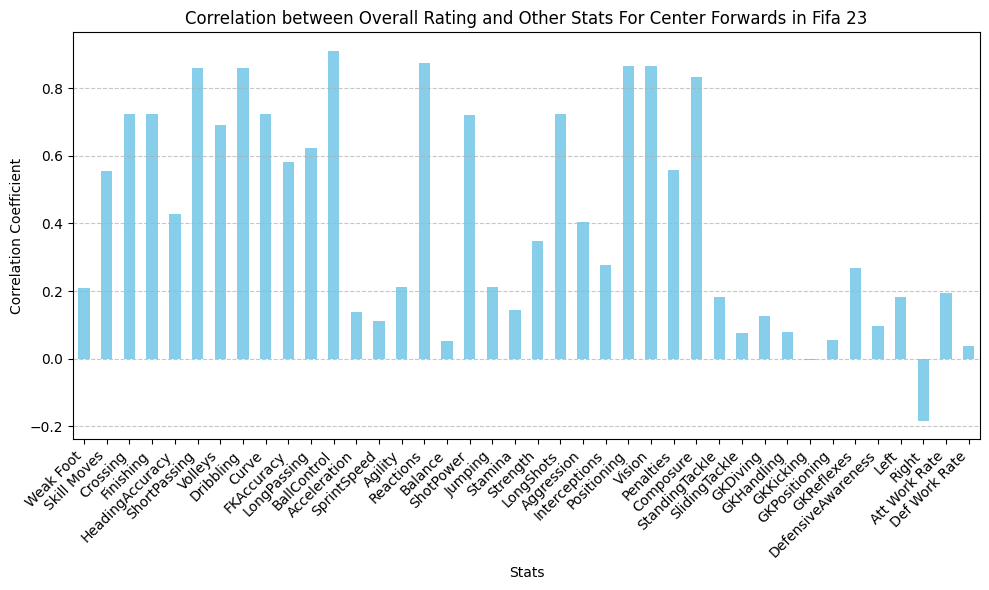

In [38]:
fifa_22_forwards = fifa_22_stats[(fifa_22_stats['Position'] == 'CF') | (fifa_22_stats['Position'] == 'LF') | (fifa_22_stats['Position'] == 'RF')].copy()
fifa_22_forwards.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_cf = fifa_22_forwards.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_cf.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Center Forwards in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
correlation_cf.drop('Overall').nlargest(10)

BallControl     0.910306
Reactions       0.875215
Positioning     0.866620
Vision          0.865263
ShortPassing    0.859314
Dribbling       0.858949
Composure       0.831475
Curve           0.724556
Finishing       0.723119
LongShots       0.722813
Name: Overall, dtype: float64

In [40]:
fifa_22_forwards.shape

(94, 41)

Wow okay, I did not expect that. Apparently at the top the cf position is extremely skewed towards left footed players. Furthermore, finishing, while still important, is not even in the top 10 positions for CFs in fifa 22.

## Wingers

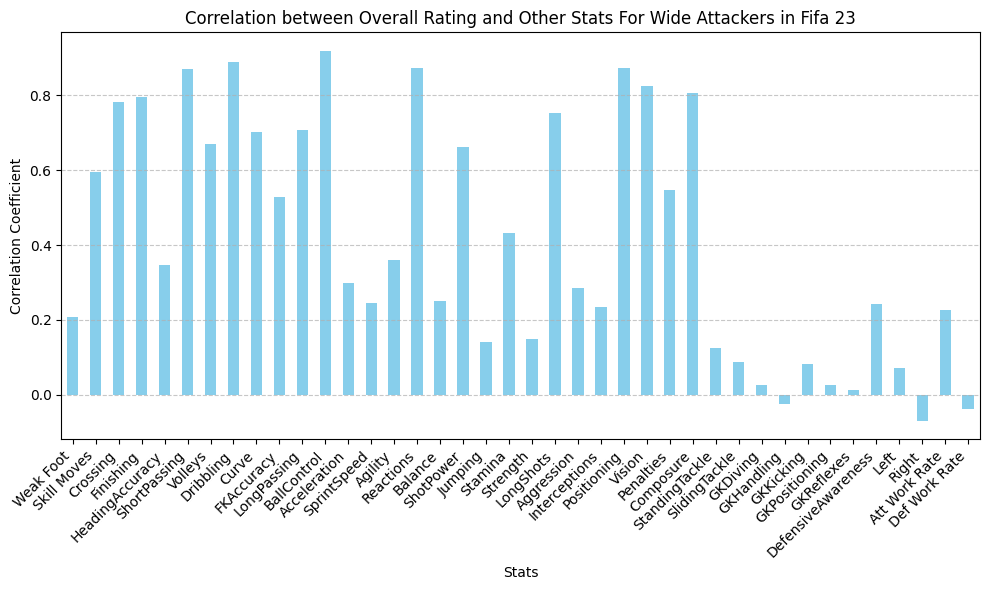

In [41]:
fifa_22_wide_attackers = fifa_22_stats[(fifa_22_stats['Position'] == 'LW') | (fifa_22_stats['Position'] == 'RW')].copy()
fifa_22_wide_attackers.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_wa = fifa_22_wide_attackers.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_wa.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Wide Attackers in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
correlation_wa.drop('Overall').nlargest(10)

BallControl     0.919457
Dribbling       0.889005
Reactions       0.872415
Positioning     0.872231
ShortPassing    0.871877
Vision          0.824623
Composure       0.805408
Finishing       0.796705
Crossing        0.782199
LongShots       0.752765
Name: Overall, dtype: float64

In [43]:
fifa_22_wide_attackers.shape

(574, 41)

That Makes sense, I would Expect to see dribbling stats as well as passing, crossing etc... in the top most correlated stats for wide forwards. Interestingly, we once again see a slight left footed bias here.

## Wide Midfielderds

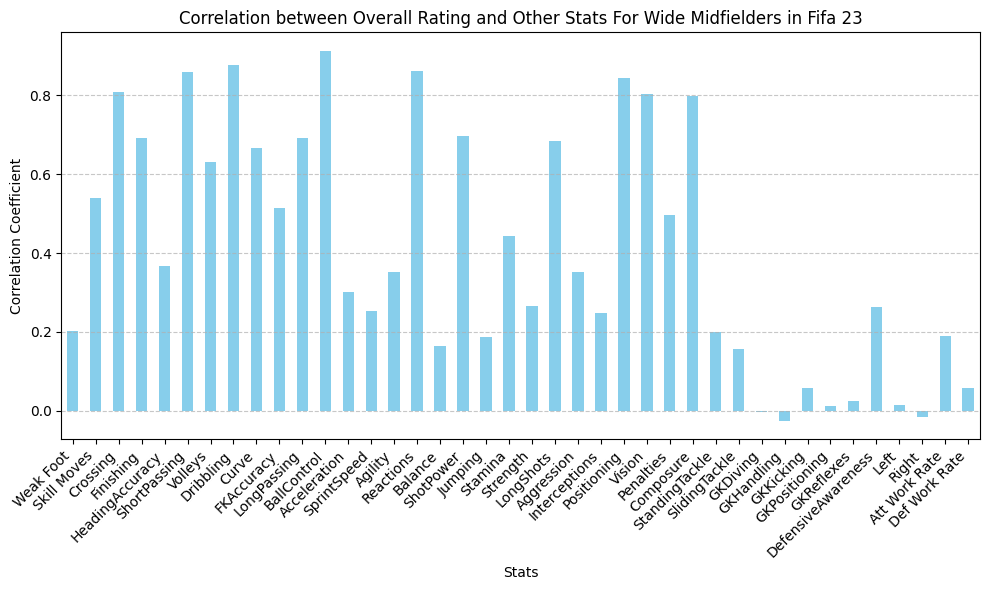

In [44]:
fifa_22_wide_midfielders = fifa_22_stats[(fifa_22_stats['Position'] == 'LM') | (fifa_22_stats['Position'] == 'RM')].copy()
fifa_22_wide_midfielders.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_wm = fifa_22_wide_midfielders.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_wm.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Wide Midfielders in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
correlation_wm.drop('Overall').nlargest(10)

BallControl     0.912162
Dribbling       0.876243
Reactions       0.860814
ShortPassing    0.858876
Positioning     0.843986
Crossing        0.808915
Vision          0.802352
Composure       0.797553
ShotPower       0.696431
LongPassing     0.691339
Name: Overall, dtype: float64

In [46]:
fifa_22_wide_midfielders.shape

(1629, 41)

Okay about as expected. Similar to wingers but a bit more focused on passing and shooting than it is dribbling.

## CAMs

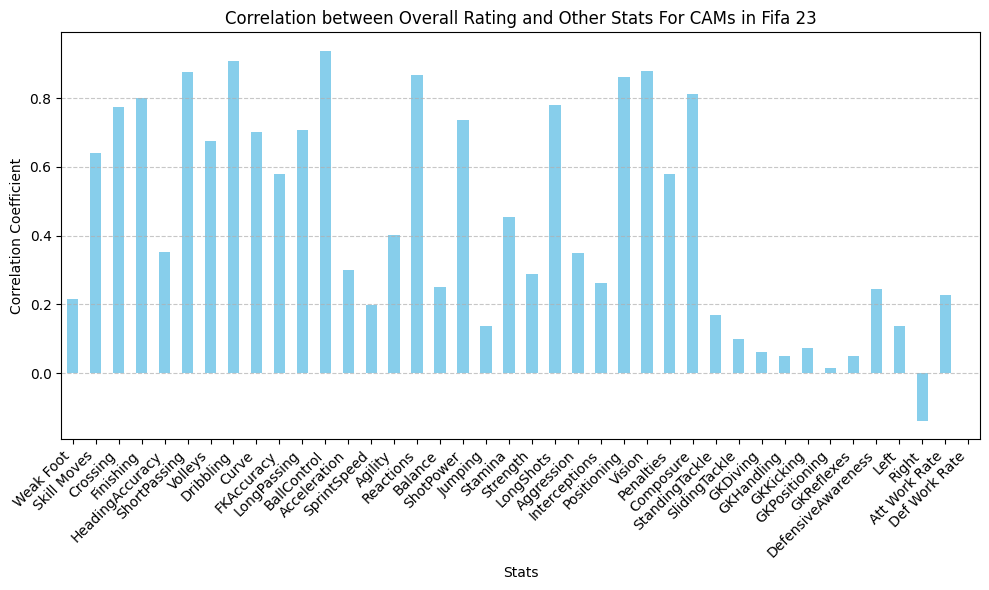

In [47]:
fifa_22_CAMs = fifa_22_stats[(fifa_22_stats['Position'] == 'CAM') | (fifa_22_stats['Position'] == 'RAM') | (fifa_22_stats['Position'] == 'CLAM')].copy()
fifa_22_CAMs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_cam = fifa_22_CAMs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_cam.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For CAMs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
correlation_cam.drop('Overall').nlargest(10)

BallControl     0.937372
Dribbling       0.907722
Vision          0.877877
ShortPassing    0.875876
Reactions       0.868109
Positioning     0.860409
Composure       0.813016
Finishing       0.801341
LongShots       0.780885
Crossing        0.774236
Name: Overall, dtype: float64

In [49]:
fifa_22_CAMs.shape

(1189, 41)

As expected we see mostly dribbling and passing stats, with a few shooting ones mixed in here. Again, the left footed bias is popping up.

## CMs

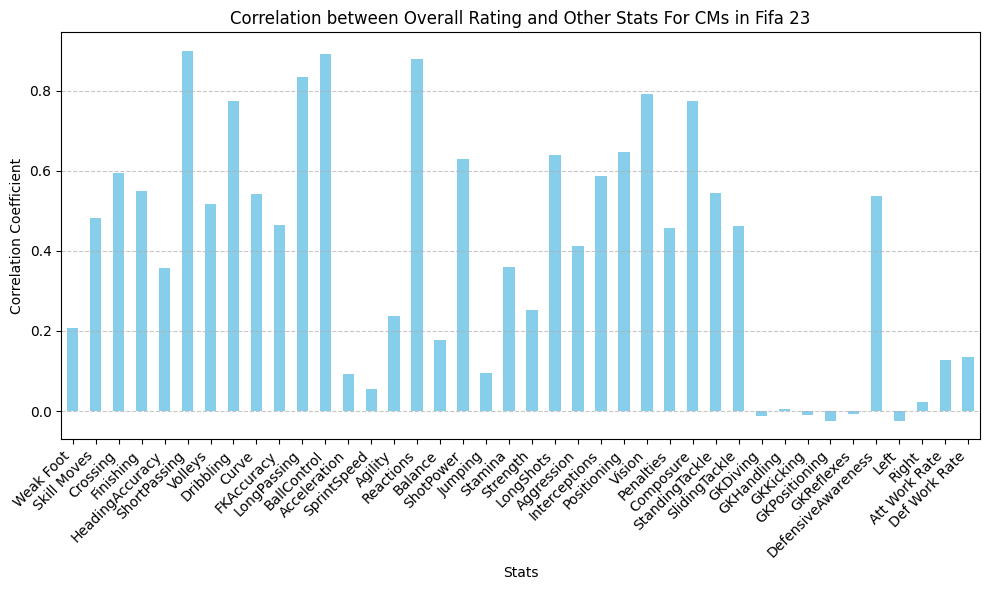

In [50]:
fifa_22_CMs = fifa_22_stats[(fifa_22_stats['Position'] == 'CM') | (fifa_22_stats['Position'] == 'LCM') | (fifa_22_stats['Position'] == 'RCM')].copy()
fifa_22_CMs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_cm = fifa_22_CMs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_cm.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For CMs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
correlation_cm.drop('Overall').nlargest(10)

ShortPassing    0.899081
BallControl     0.890991
Reactions       0.878214
LongPassing     0.832643
Vision          0.792219
Dribbling       0.774561
Composure       0.773501
Positioning     0.647450
LongShots       0.639845
ShotPower       0.629341
Name: Overall, dtype: float64

In [52]:
fifa_22_CMs.shape

(1229, 41)

Interesting. Passing and dribbling stats do make sense here, but I would have expected to see more importance on physical stats, in particular stamina here. The inclusion of some defensive stats do make sense here though. Left footed bias again! (see below)

Huh, Further addition - ive been changing these to inlcude Left and Right positons (e.g. lcm and rcm rather than jsut cm), and this has skewed the cm stats more towards attacking stats then defensive. I will have to look into this.

## CDMs

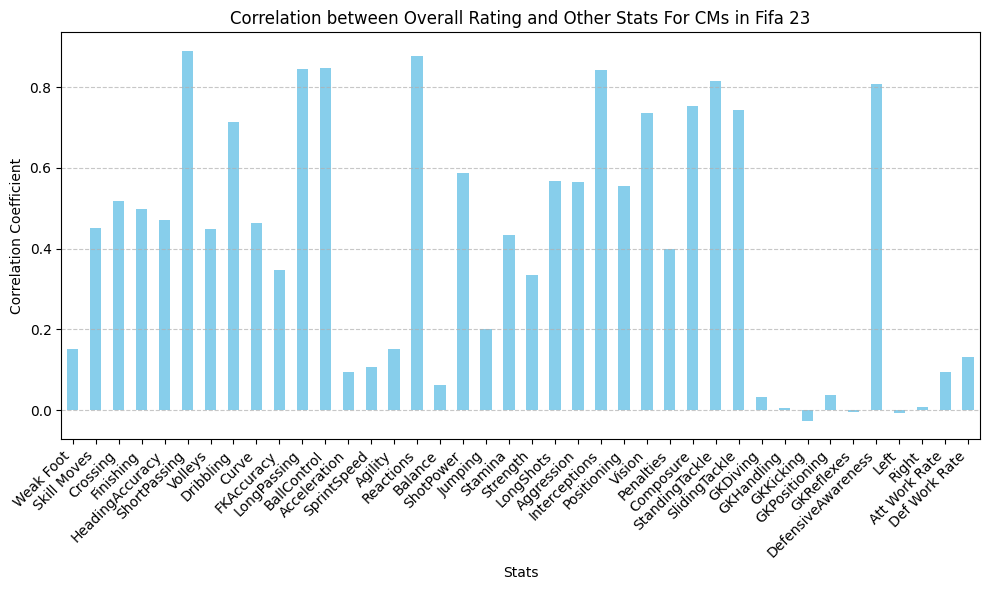

In [53]:
fifa_22_CDMs = fifa_22_stats[(fifa_22_stats['Position'] == 'CDM') | (fifa_22_stats['Position'] == 'LDM') | (fifa_22_stats['Position'] == 'RDM')].copy()
fifa_22_CDMs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_cdm = fifa_22_CDMs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_cdm.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For CMs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
correlation_cdm.drop('Overall').nlargest(10)

ShortPassing          0.889677
Reactions             0.877922
BallControl           0.848368
LongPassing           0.844240
Interceptions         0.841497
StandingTackle        0.816084
DefensiveAwareness    0.806970
Composure             0.753784
SlidingTackle         0.743374
Vision                0.735245
Name: Overall, dtype: float64

In [55]:
fifa_22_CDMs.shape

(977, 41)

About as expected. Defensive stats are really starting to appear now.
Interestingly left footed bias doesn't really seem to be a thing with defensive mids. Observing the graph it may even have slightly dissapeared.

## Full Backs

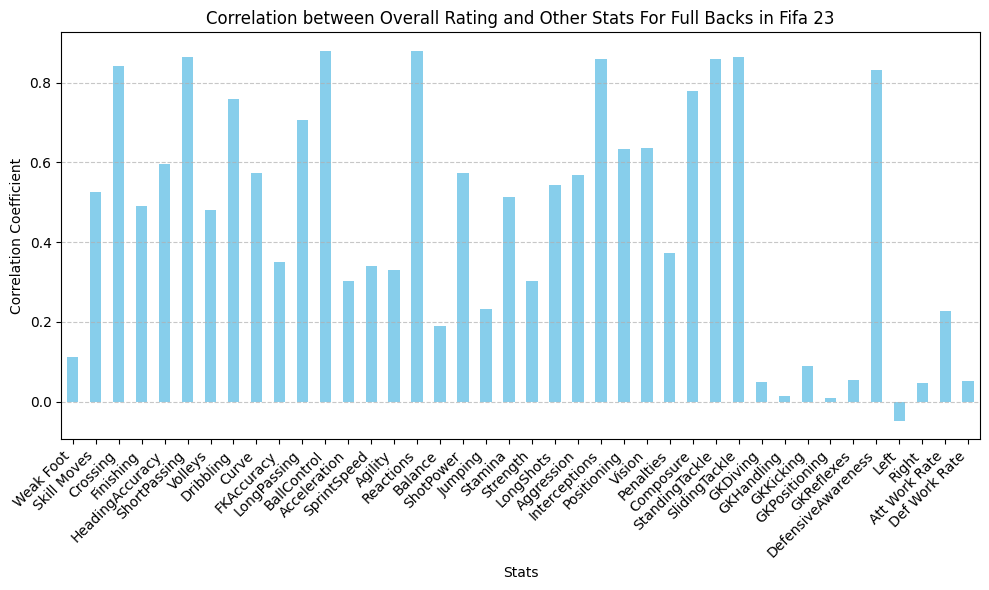

In [56]:
fifa_22_full_backs = fifa_22_stats[(fifa_22_stats['Position'] == 'LB') | (fifa_22_stats['Position'] == 'RB')].copy()
fifa_22_full_backs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_fb = fifa_22_full_backs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_fb.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Full Backs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
correlation_fb.drop('Overall').nlargest(10)

BallControl           0.879961
Reactions             0.878829
SlidingTackle         0.864025
ShortPassing          0.863524
StandingTackle        0.860037
Interceptions         0.858618
Crossing              0.843086
DefensiveAwareness    0.831911
Composure             0.779499
Dribbling             0.759959
Name: Overall, dtype: float64

In [58]:
fifa_22_full_backs.shape

(1494, 41)

## Wing Backs

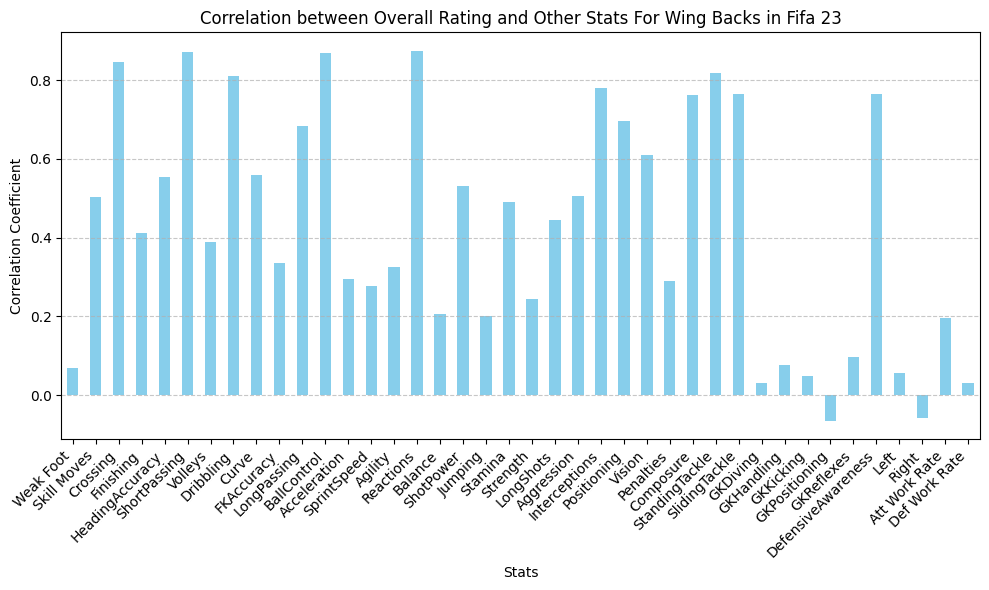

In [59]:
fifa_22_wing_backs = fifa_22_stats[(fifa_22_stats['Position'] == 'LWB') | (fifa_22_stats['Position'] == 'RWB')].copy()
fifa_22_wing_backs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_wb = fifa_22_wing_backs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_wb.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For Wing Backs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
correlation_wb.drop('Overall').nlargest(10)

Reactions             0.874724
ShortPassing          0.871302
BallControl           0.869033
Crossing              0.846764
StandingTackle        0.818783
Dribbling             0.811896
Interceptions         0.780384
DefensiveAwareness    0.764750
SlidingTackle         0.764512
Composure             0.763249
Name: Overall, dtype: float64

In [61]:
fifa_22_wing_backs.shape

(414, 41)

Wow okay. Some really interesting takeaways from both wing and full backs. I would have expected both pace attributes to have wayyyy larger correlations here. Composure also seems to have less of an impact the wider out on the pitch we go, although still being an important stat. Once again we don't really have a left footed bias here if we average out the two.

## CBs

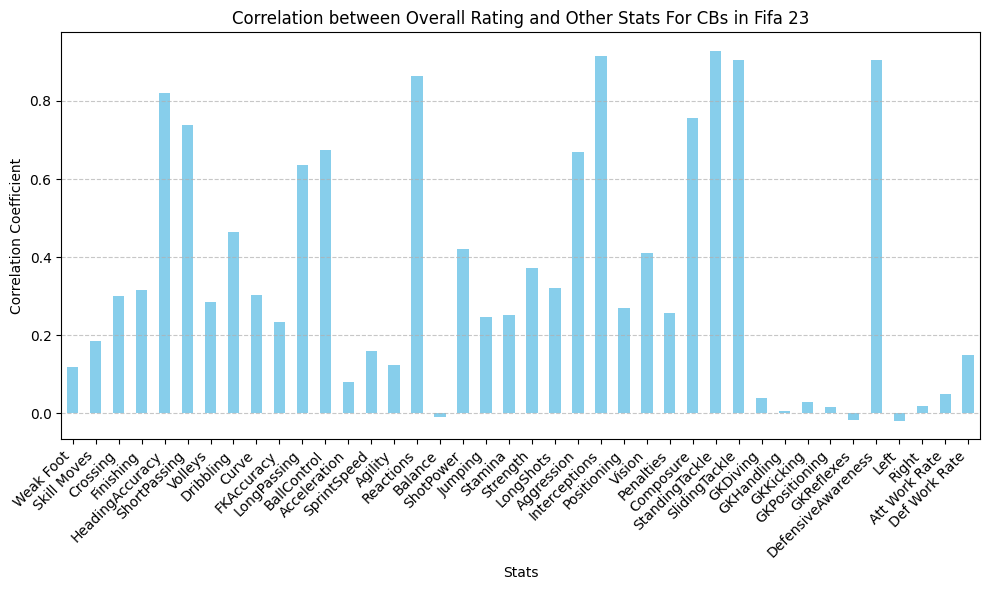

In [62]:
fifa_22_CBs = fifa_22_stats[(fifa_22_stats['Position'] == 'CB') | (fifa_22_stats['Position'] == 'LCB') | (fifa_22_stats['Position'] == 'RCB')].copy()
fifa_22_CBs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_cb = fifa_22_CBs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_cb.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For CBs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
correlation_cb.drop('Overall').nlargest(10)

StandingTackle        0.928158
Interceptions         0.914130
DefensiveAwareness    0.905573
SlidingTackle         0.903666
Reactions             0.864475
HeadingAccuracy       0.819169
Composure             0.754975
ShortPassing          0.737902
BallControl           0.675170
Aggression            0.668779
Name: Overall, dtype: float64

In [64]:
fifa_22_CBs.shape

(2477, 41)

As expected, defensive stats trump the charts here, as well as seeing some physical ones in there. The left footed bias is finally broken!!!
Some passing stats in there, I think we'd expect that as it's really only top level centre backs that focus on areas like passing rather than just their defense.

## GKs

Aaaaand finally goalkeepers. Im curious about this one, what stats other than the gk stats have any significant correation to overall.

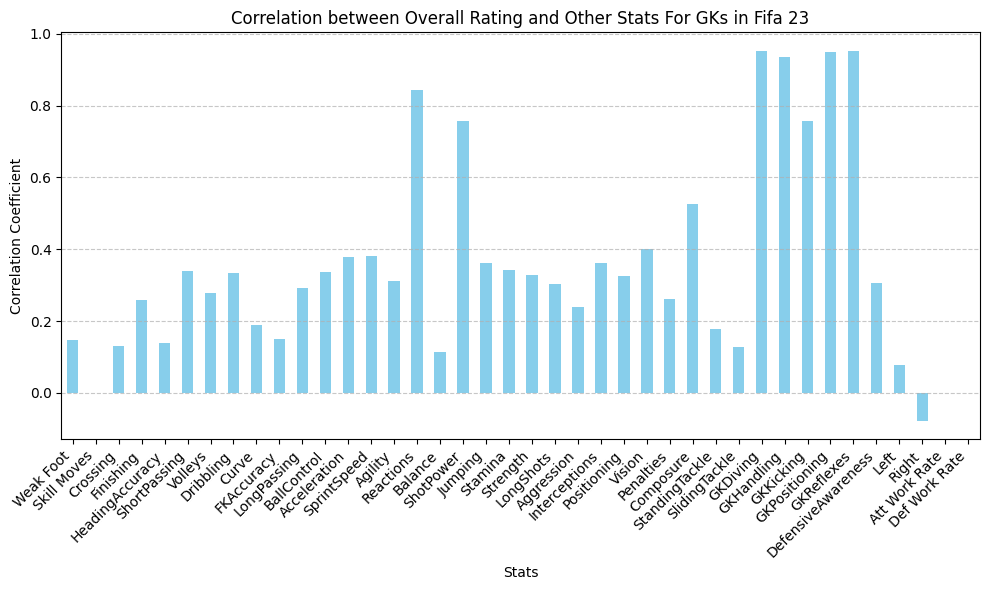

In [65]:
fifa_22_GKs = fifa_22_stats[(fifa_22_stats['Position'] == 'GK')].copy()
fifa_22_GKs.drop(columns=["Position", "ID"], inplace=True)

#Lets Purely Look at correlation with overall for strikers now

correlation_gk = fifa_22_GKs.corr()['Overall']

plt.figure(figsize=(10, 6))
correlation_gk.drop('Overall').plot(kind='bar', color='skyblue')
plt.title('Correlation between Overall Rating and Other Stats For GKs in Fifa 23')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
correlation_gk.drop('Overall').nlargest(10)

GKDiving         0.952676
GKReflexes       0.952362
GKPositioning    0.949253
GKHandling       0.936771
Reactions        0.843695
GKKicking        0.758227
ShotPower        0.757070
Composure        0.525557
Vision           0.400009
SprintSpeed      0.380832
Name: Overall, dtype: float64

In [67]:
fifa_22_GKs.shape

(1169, 41)

Wow, reactions is even more important than Kicking... That being said we do often see top level goalkeepers as incredible shot stoppers but being not great with their feet so this does make some sense, just thought it would have been more encompassed within GKReflexes. That however seems to be the only other non-Gk stat with any significant correlation.

So what have we found:
-Across all positions, reactions and composure seem to be incredibly important, although composure is definatly more correlated with attackers than defenders.
-For most of the positions accross the pitch we see a slight to moderate left footed bias when correlated with rating.
-Physical Stats and Pace seem to have very little correlation with overalls for all positions baring CBs, where there is slighly more correlation with physical attributes.

# Modelling

Now, lets see if there is consistence in these ratings.

In this instance I am going to train a linear regression model to predict a player's overall based on their position and individual stats.
If the rating system is consistent then it should be able to do this particularly reliably, say with an R^2 score of >0.97

Let's start by seeing how well we can do it for the entire data set, rather than just the individual position ones. A linear regression model should be able to capture dependencies between different data points - e.g. positions and certain stats.

For the sake of ease, since I have already simplified positions there, I am going to just combine all my mini positional dataframes.

## Final Cleaning

In [68]:
fifa_22_strikers["Position"] = "ST"
fifa_22_forwards["Position"] = "CF"
fifa_22_wide_attackers["Position"] = "WA"
fifa_22_wide_midfielders["Position"] = "WM"
fifa_22_CAMs["Position"] = "CAM"
fifa_22_CMs["Position"] = "CM"
fifa_22_CDMs["Position"] = "CDM"
fifa_22_full_backs["Position"] = "FB"
fifa_22_wing_backs["Position"] = "WB"
fifa_22_CBs["Position"] = "CB"
fifa_22_GKs["Position"] = "GK"

combined_df = pd.concat([fifa_22_strikers, fifa_22_forwards, fifa_22_wide_attackers, fifa_22_wide_midfielders, fifa_22_CAMs, fifa_22_CMs, fifa_22_CDMs, fifa_22_full_backs, fifa_22_wing_backs, fifa_22_CBs, fifa_22_GKs], ignore_index=True)
combined_df.dropna(inplace=True)

one_hot_encoded_pos = pd.get_dummies(combined_df['Position'])
combined_prepped = pd.concat([combined_df, one_hot_encoded_pos], axis=1)
combined_prepped.drop(columns=["Position"], inplace=True)


In [69]:
combined_prepped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Overall             12846 non-null  int64  
 1   Weak Foot           12846 non-null  float64
 2   Skill Moves         12846 non-null  float64
 3   Crossing            12846 non-null  float64
 4   Finishing           12846 non-null  float64
 5   HeadingAccuracy     12846 non-null  float64
 6   ShortPassing        12846 non-null  float64
 7   Volleys             12846 non-null  float64
 8   Dribbling           12846 non-null  float64
 9   Curve               12846 non-null  float64
 10  FKAccuracy          12846 non-null  float64
 11  LongPassing         12846 non-null  float64
 12  BallControl         12846 non-null  float64
 13  Acceleration        12846 non-null  float64
 14  SprintSpeed         12846 non-null  float64
 15  Agility             12846 non-null  float64
 16  Reac

## Modelling

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [71]:
def reg_analisis(predictions, y_test):
    print("MAE =  " + str(mean_absolute_error(y_test,predictions)))
    print("r2 =  " + str(r2_score(y_test, predictions)))
    print("RMSE = " + str((mean_squared_error(y_test,predictions))**0.5))

In [72]:
def lin_reg(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)
    predictions = reg.predict(X_test)
    reg_analisis(predictions, y_test)

In [73]:
def rand_forest(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    rfc = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
    predictions = rfc.predict(X_test).round()
    reg_analisis(predictions, y_test)

### For all Positions

In [74]:
x = combined_prepped.drop(columns="Overall")
y = combined_prepped["Overall"]

In [75]:
lin_reg(x, y)

MAE =  1.6861680016879217
r2 =  0.8681020652222126
RMSE = 2.151766527928681


Lets try again with random Forest regression

In [76]:
rand_forest(x, y)

MAE =  0.9626459143968872
r2 =  0.9497553914196236
RMSE = 1.3317435398871391


How about if we remove skill moves, work rates, etc...

Basically all non numerical stats

In [77]:
stats_only = combined_prepped.drop(columns=["Weak Foot", "Skill Moves", "Left", "Right", "Att Work Rate", "Def Work Rate"])

In [78]:
stats_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Overall             12846 non-null  int64  
 1   Crossing            12846 non-null  float64
 2   Finishing           12846 non-null  float64
 3   HeadingAccuracy     12846 non-null  float64
 4   ShortPassing        12846 non-null  float64
 5   Volleys             12846 non-null  float64
 6   Dribbling           12846 non-null  float64
 7   Curve               12846 non-null  float64
 8   FKAccuracy          12846 non-null  float64
 9   LongPassing         12846 non-null  float64
 10  BallControl         12846 non-null  float64
 11  Acceleration        12846 non-null  float64
 12  SprintSpeed         12846 non-null  float64
 13  Agility             12846 non-null  float64
 14  Reactions           12846 non-null  float64
 15  Balance             12846 non-null  float64
 16  Shot

Now we are left with only stats and positions

In [79]:
x = stats_only.drop(columns="Overall")
y = stats_only["Overall"]

In [80]:
lin_reg(x, y)

MAE =  1.6948866407761862
r2 =  0.866096728869362
RMSE = 2.1680622269706005


In [81]:
rand_forest(x, y)

MAE =  0.9591439688715954
r2 =  0.9503837246116117
RMSE = 1.3233902930368955


Right. So here we can see that while our models can do it well, they arent perfect, both when including non-numerical stats and including them.

How about we now try per position?

In theory, our models should have captured the relationships, but lets give it a go anyway. If anything reducing the number of data points should help somewhat.

### Strikers

In [82]:
x = fifa_22_strikers.drop(columns=["Overall", "Position"])
y = fifa_22_strikers["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.7618072621195018
r2 =  0.9730556483666853
RMSE = 0.9092947268366073

Random forest regression:


MAE =  0.921875
r2 =  0.9464082667599037
RMSE = 1.26614572621006


### Center forwards

In [83]:
x = fifa_22_forwards.drop(columns=["Overall", "Position"])
y = fifa_22_forwards["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.8316151753060724
r2 =  0.9624052204134256
RMSE = 1.1048918667139822

Random forest regression:
MAE =  1.4736842105263157
r2 =  0.8870031911807369
RMSE = 2.077447826946374


### Wingers

In [84]:
x = fifa_22_wide_attackers.drop(columns=["Overall", "Position"])
y = fifa_22_wide_attackers["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.6728363854529529
r2 =  0.968886946537046
RMSE = 1.168389162333553

Random forest regression:


MAE =  1.1304347826086956
r2 =  0.924197936266344
RMSE = 1.6939791077198396


### Wide Midfielders

In [85]:
x = fifa_22_wide_midfielders.drop(columns=["Overall", "Position"])
y = fifa_22_wide_midfielders["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:


MAE =  0.7910132430928738
r2 =  0.9554464285976031
RMSE = 1.167817475880572

Random forest regression:
MAE =  0.9601226993865031
r2 =  0.9335387893768016
RMSE = 1.4495609659014106


### CAMs

In [86]:
x = fifa_22_CAMs.drop(columns=["Overall", "Position"])
y = fifa_22_CAMs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.7116424332535549
r2 =  0.9792455534371577
RMSE = 0.8953476380467816

Random forest regression:


MAE =  1.0630252100840336
r2 =  0.9498094682275395
RMSE = 1.4097499629307295


### CMs

In [87]:
x = fifa_22_CMs.drop(columns=["Overall", "Position"])
y = fifa_22_CMs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  1.1644105477983924
r2 =  0.9220000992574839
RMSE = 1.4762376598004319

Random forest regression:


MAE =  0.967479674796748
r2 =  0.9405115236040226
RMSE = 1.3190289604000298


### CDMs

In [88]:
x = fifa_22_CDMs.drop(columns=["Overall", "Position"])
y = fifa_22_CDMs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.8609444779614998
r2 =  0.9490257633320853
RMSE = 1.2441673238892814

Random forest regression:


MAE =  0.9948979591836735
r2 =  0.9278746372879294
RMSE = 1.3832083379312203


### Full Backs

In [89]:
x = fifa_22_full_backs.drop(columns=["Overall", "Position"])
y = fifa_22_full_backs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.4692776588979172
r2 =  0.985305473807036
RMSE = 0.6771443380749367

Random forest regression:


MAE =  0.7926421404682275
r2 =  0.9605668931193689
RMSE = 1.1169116521891902


### Wing Backs

In [90]:
x = fifa_22_wing_backs.drop(columns=["Overall", "Position"])
y = fifa_22_wing_backs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.7120080354814535
r2 =  0.9721271867079405
RMSE = 0.9355805489109121

Random forest regression:
MAE =  1.0
r2 =  0.933741570805236
RMSE = 1.3927523240492468


### CBs

In [91]:
x = fifa_22_CBs.drop(columns=["Overall", "Position"])
y = fifa_22_CBs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.7740217297714643
r2 =  0.9689258882770557
RMSE = 0.9470194033602573

Random forest regression:


MAE =  0.9637096774193549
r2 =  0.9450485457598956
RMSE = 1.270001270001905


### GKs

In [92]:
x = fifa_22_GKs.drop(columns=["Overall", "Position"])
y = fifa_22_GKs["Overall"]

print("Linear regression:")
lin_reg(x, y)
print("\nRandom forest regression:")
rand_forest(x, y)

Linear regression:
MAE =  0.2745008803372151
r2 =  0.9971141764731485
RMSE = 0.3514695163573065

Random forest regression:


MAE =  0.48717948717948717
r2 =  0.9847056192916975
RMSE = 0.8059606997693185


These numbers are a lot better, we can clearly see that there is a good level of consistency for player ratings in Fifa 22, at least when analysing the numbers of a position by position basis, and even as a whole.

I think we can confidently state then that their is enough consistency that when we bring in factors such as age, value and potential, we will be able to have a good go at predicting player's ratings between games.

# Predicting Player's Rating Accross Games

### Further Cleaning

First we will need to clean up further values such as Value, Wages, etc...

In [93]:
fifa22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [94]:
fifa23_overalls = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Dataset_small/FIFA23_official_data.csv", usecols=["ID", "Overall"])

In [95]:
fifa23_overalls.head(5)

,ID,Overall
0,209658,87
1,212198,86
2,224334,85
3,192985,91
4,224232,86


In [96]:
cross_game_overalls = pd.merge(fifa22, fifa23_overalls, on="ID", suffixes=("", "_23"))
cross_game_overalls.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Overall_23
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,86
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,87
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,84
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,91
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,85


In [97]:
cross_game_overalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7663 non-null   int64  
 1   Name                      7663 non-null   object 
 2   Age                       7663 non-null   int64  
 3   Photo                     7663 non-null   object 
 4   Nationality               7663 non-null   object 
 5   Flag                      7663 non-null   object 
 6   Overall                   7663 non-null   int64  
 7   Potential                 7663 non-null   int64  
 8   Club                      7563 non-null   object 
 9   Club Logo                 7663 non-null   object 
 10  Value                     7663 non-null   object 
 11  Wage                      7663 non-null   object 
 12  Special                   7663 non-null   int64  
 13  Preferred Foot            7663 non-null   object 
 14  Internat

Eesh not a lot of datapoints, but let's give it a go.

In [98]:

cross_game_overalls['Position'] = cross_game_overalls['Position'].str.extract(r'>(\w+)$')
cross_game_overalls.loc[cross_game_overalls['Position'] == "SUB", 'Overall'] = cross_game_overalls.loc[cross_game_overalls['Position'] == "SUB", 'Best Overall Rating']
cross_game_overalls.loc[cross_game_overalls['Position'] == "SUB", 'Position'] = cross_game_overalls.loc[cross_game_overalls['Position'] == "SUB", 'Best Position']



In [99]:
cross_game_overalls.drop(columns=["ID", "Photo", "Nationality", "Flag", "Club Logo", "Body Type", "Jersey Number", "Joined", "Loaned From", "Contract Valid Until", "Marking", "Release Clause", "Best Position", "Best Overall Rating"], inplace=True)

In [100]:
#Cleaning wage and Value

def clean_currency(wage):
    wage = wage.replace('€', '')  # Remove euro symbol
    if 'K' in wage:  # For thousands
        wage = wage.replace('K', '')  # Remove 'k'
        wage = float(wage) * 1000  # Convert to float and adjust for thousands
    elif 'M' in wage:  # For millions
        wage = wage.replace('M', '')  # Remove 'M'
        wage = float(wage) * 1000000  # Convert to float and adjust for millions
    else:  # For other cases
        wage = float(wage)  # Convert to float
    return wage

cross_game_overalls["Wage"] = cross_game_overalls["Wage"].apply(clean_currency)
cross_game_overalls["Value"] = cross_game_overalls["Value"].apply(clean_currency)

In [101]:
def yntotf(word):
    try:
        if pd.isna(word):
            word = False
        elif word.lower() == "yes":
            word = True
        else:
            word = False
    except AttributeError as e:
        print(word)
        print(e)
    finally:
        return word

cross_game_overalls["Real Face"] = cross_game_overalls["Real Face"].apply(yntotf)

In [102]:

one_hot_encoded_foot = pd.get_dummies(cross_game_overalls['Preferred Foot'])
cross_game_overalls = pd.concat([cross_game_overalls, one_hot_encoded_foot], axis=1)
cross_game_overalls.drop(columns=["Preferred Foot"], inplace=True)

cross_game_overalls['Att Work Rate'] = cross_game_overalls['Work Rate'].str.extract(r'^(\w+)/')
cross_game_overalls['Def Work Rate'] = cross_game_overalls['Work Rate'].str.extract(r'/ (\w+)$')

cross_game_overalls.drop(columns=["Work Rate"], inplace=True)


cross_game_overalls['Att Work Rate'] = cross_game_overalls['Att Work Rate'].replace({'High': 2, 'Medium': 1, 'Low': 0})
cross_game_overalls['Def Work Rate'] = cross_game_overalls['Def Work Rate'].replace({'High': 2, 'Medium': 1, 'Low': 0})

#Some non int conforming values turned to nan
cross_game_overalls['Att Work Rate'] = pd.to_numeric(cross_game_overalls['Att Work Rate'], errors='coerce').astype('Int64')
cross_game_overalls['Def Work Rate'] = pd.to_numeric(cross_game_overalls['Def Work Rate'], errors='coerce').astype('Int64')

In [103]:
#Let's clean up positions, starting by simplifying them and then using one-hot-encoding on the column

def simplify_pos(pos):
    if pos == "LS" or pos == "RS":
        pos = "ST"
    elif pos == "LF" or pos == "RF":
        pos = "CF"
    elif pos == "LAM" or pos == "RAM":
        pos = "CAM"    
    elif pos == "LCM" or pos == "RCM":
        pos = "CM"
    elif pos == "LDM" or pos == "RDM":
        pos = "CDM"
    elif pos == "LCB" or pos == "RCB":
        pos = "CB"
    return pos

cross_game_overalls["Position"] = cross_game_overalls["Position"].apply(simplify_pos)

one_hot_encoded_pos = pd.get_dummies(cross_game_overalls['Position'])
cross_game_overalls = pd.concat([cross_game_overalls, one_hot_encoded_pos], axis=1)
cross_game_overalls.drop(columns=["Position"], inplace=True)


In [104]:
def standardise_height(height):
    try:
        if pd.isna(height):
            return height
        elif "cm" in height:
            height = float(height.replace("cm", ""))
        else:
            print(height)
    except TypeError as e:
        print(e)
        print(height)
    finally:
        return height

def standardise_weight(weight):
    try:
        if pd.isna(weight):
            return weight
        elif "kg" in weight:
            weight = float(weight.replace("kg", ""))
        else:
            print(weight)
    except TypeError as e:
        print(e)
        print(weight)
    finally:
        return weight

cross_game_overalls["Height"] = cross_game_overalls["Height"].apply(standardise_height)
cross_game_overalls["Weight"] = cross_game_overalls["Weight"].apply(standardise_weight)

In [105]:
cross_game_overalls.dropna(inplace = True)

In [106]:
cross_game_overalls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7448 entries, 0 to 7662
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      7448 non-null   object 
 1   Age                       7448 non-null   int64  
 2   Overall                   7448 non-null   int64  
 3   Potential                 7448 non-null   int64  
 4   Club                      7448 non-null   object 
 5   Value                     7448 non-null   float64
 6   Wage                      7448 non-null   float64
 7   Special                   7448 non-null   int64  
 8   International Reputation  7448 non-null   float64
 9   Weak Foot                 7448 non-null   float64
 10  Skill Moves               7448 non-null   float64
 11  Real Face                 7448 non-null   bool   
 12  Height                    7448 non-null   float64
 13  Weight                    7448 non-null   float64
 14  Crossing     

# Correlations

In [109]:
cross_game_complete = cross_game_overalls.copy()

cross_game_overalls.drop(columns=["Name", "Club"], inplace=True)

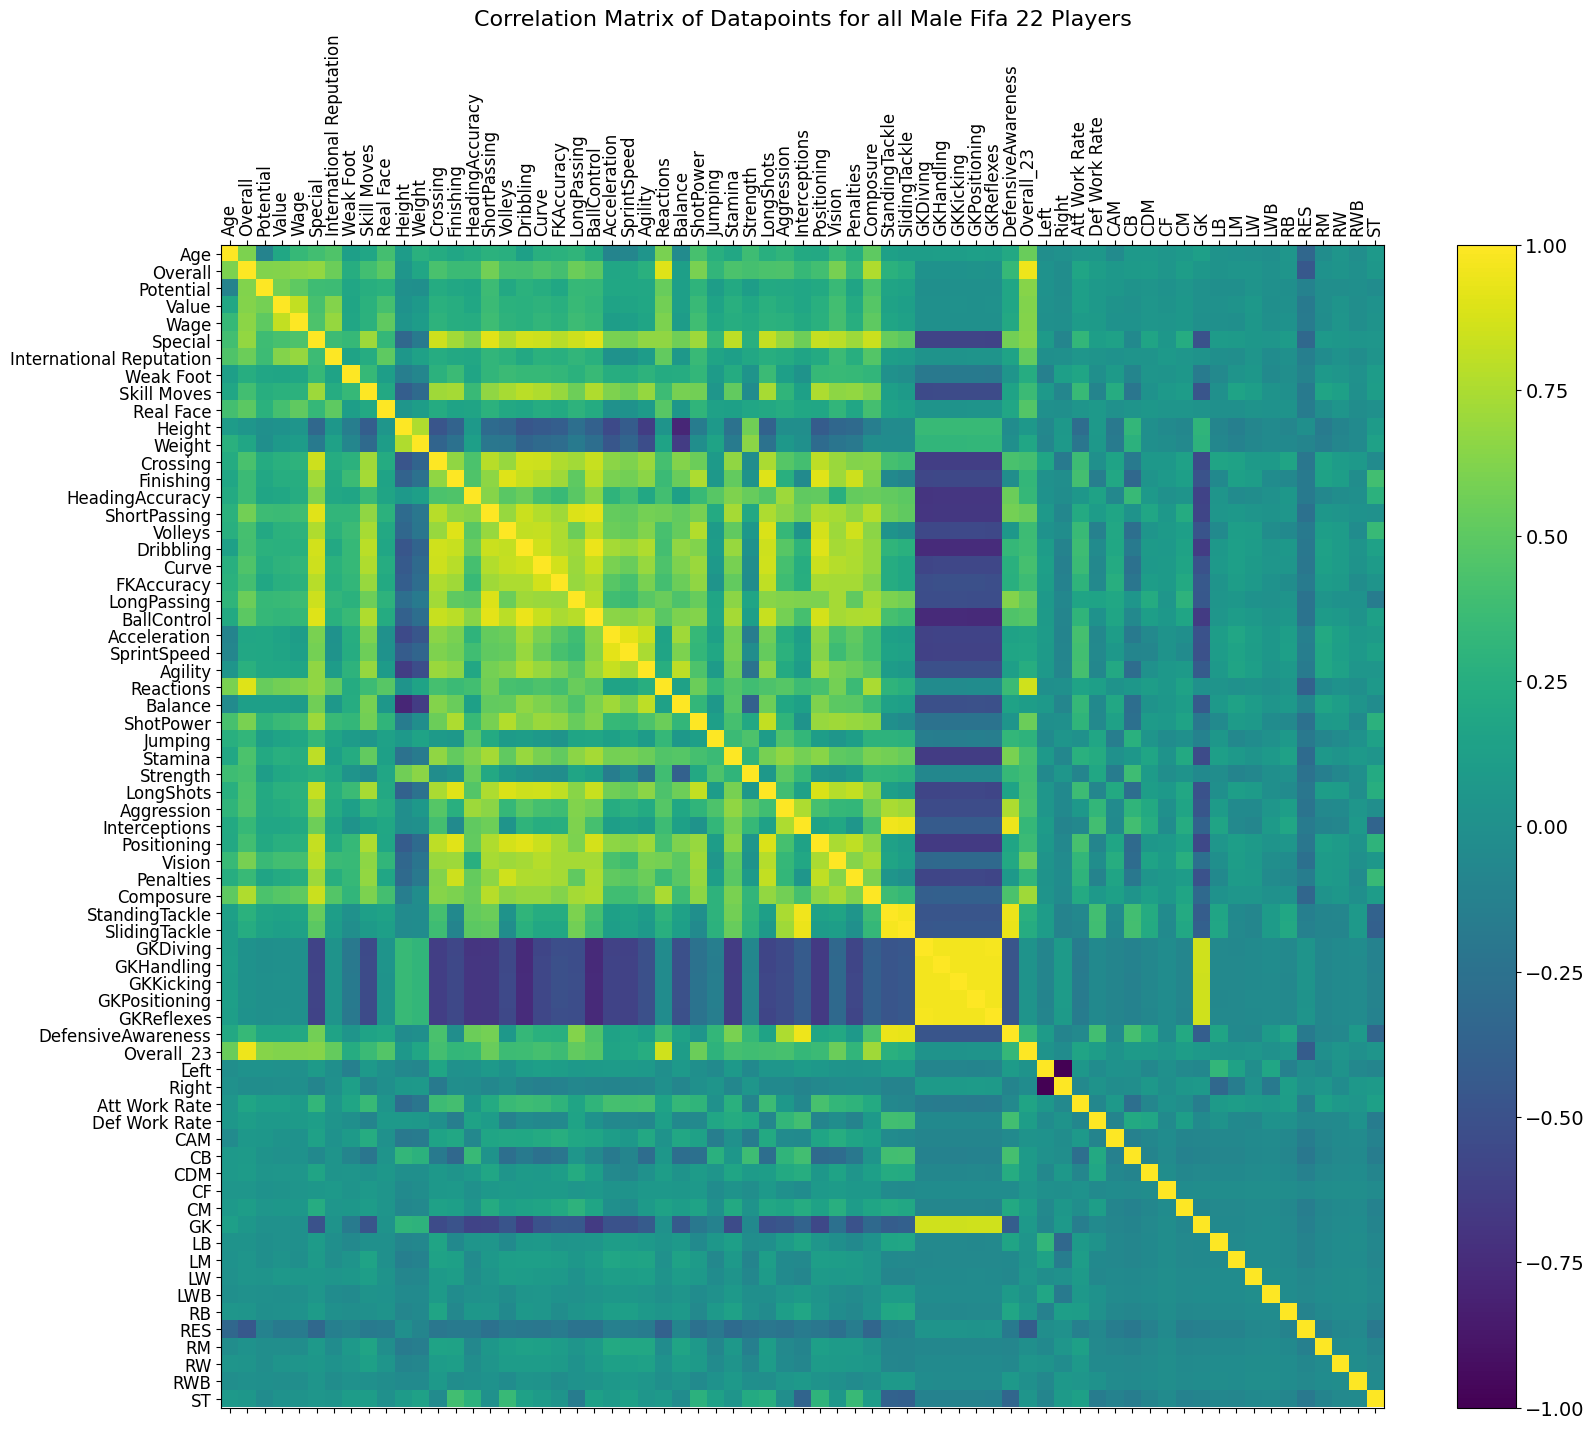

In [110]:
f = plt.figure(figsize=(19, 15))
plt.matshow(cross_game_overalls.corr(), fignum=f.number)
plt.xticks(range(cross_game_overalls.shape[1]), cross_game_overalls.columns, fontsize=12, rotation=90)
plt.yticks(range(cross_game_overalls.shape[1]), cross_game_overalls.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Datapoints for all Male Fifa 22 Players', fontsize=16);

Okay, not much clear here to be honest. 

Does make sense though, as most of the correlations here regarding positions would be occurring in 3+ dimensions, which we can't visualise in a graph such as this.

Thankfully, our models should be able to handle such relationships!

# Modelling

In [111]:
x = cross_game_overalls.drop(columns="Overall_23")
y = cross_game_overalls["Overall_23"]

print("Linear Regression:")
lin_reg(x, y)
print("Random Forest: ")
rand_forest(x, y)

Linear Regression:
MAE =  1.7295971954579632
r2 =  0.9012744922045518
RMSE = 2.299096349294836
Random Forest: 
MAE =  1.708724832214765
r2 =  0.9001732909164545
RMSE = 2.2926787474319585


### Results

Okay, we can do this quite reliably - only a MAE of ~1.67 got both the models.

That being said I think we could do better. Over the course of the lifespan of a fifa game players' ratings do in/deacrease, and I'd imagine that if we had a dataset including these values they would be a massive predictor of how the players' ratings will continue to change before the next game. 

Unfortunately though I do not just now, although I'll have to hunt. If I could get my model up to an r2 value of >0.95 that would be great.

# Using Real Data to Predict Player's Overall Ratings

Unfortunately the only easily available data I could find here was quite messy.

Lets give it a go though.

As I'll be needing to combine multiple datasets based only off of player names, imma start with just the premier league and then branch out.


In [159]:
player_ratings = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/European Top 5/Player Ratings/ratings.csv", usecols=["player", "rating", "home_team", "away_team", "season"])

In [160]:
player_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640501 entries, 0 to 640500
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player     640501 non-null  object 
 1   rating     467518 non-null  float64
 2   home_team  640501 non-null  object 
 3   away_team  640501 non-null  object 
 4   season     640501 non-null  object 
dtypes: float64(1), object(4)
memory usage: 24.4+ MB


Jheez okay that's quite a lot of entries.

We have all the players' ratings from all games played in europe's top 5 leagues from 2015-2023.

To start we will extract just the data for premier league players from the 2021-22 season, calculate their average ratings and then try and match it up with our other fifa dataset.



In [161]:
ratings_2021 = player_ratings[player_ratings["season"] == "2021/2022"]
ratings_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76064 entries, 487455 to 563518
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player     76064 non-null  object 
 1   rating     54926 non-null  float64
 2   home_team  76064 non-null  object 
 3   away_team  76064 non-null  object 
 4   season     76064 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.5+ MB


In [162]:
premier_league_teams_2021_22 = [ #Additional naming removed to match dataset
    'Arsenal', 
    'Aston Villa', 
    'Brentford', 
    'Brighton', 
    'Burnley',
    'Chelsea', 
    'Crystal Palace', 
    'Everton', 
    'Leeds', 
    'Leicester',
    'Liverpool', 
    'Manchester City', 
    'Manchester United', 
    'Newcastle United',
    'Norwich', 
    'Southampton', 
    'Tottenham', 
    'Watford',
    'West Ham', 
    'Wolverhampton Wanderers'
]

ratings_prem = ratings_2021[
    (ratings_2021['home_team'].isin(premier_league_teams_2021_22)) |
    (ratings_2021['away_team'].isin(premier_league_teams_2021_22))
]
ratings_prem.dropna(inplace=True)
ratings_prem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10485 entries, 490576 to 563511
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player     10485 non-null  object 
 1   rating     10485 non-null  float64
 2   home_team  10485 non-null  object 
 3   away_team  10485 non-null  object 
 4   season     10485 non-null  object 
dtypes: float64(1), object(4)
memory usage: 491.5+ KB


/var/folders/5b/kfhm4mss6sjdr7rf8618rz1w0000gq/T/ipykernel_52724/1957448087.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_prem.dropna(inplace=True)


In [163]:
average_ratings = ratings_prem.groupby('player')['rating'].mean().reset_index()
average_ratings.columns = ['player', 'avg_rating']

average_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player      537 non-null    object 
 1   avg_rating  537 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.5+ KB


In [164]:
average_ratings["player"].nunique()

537

Perfect, we don't have any names occurring multiple times. This makes our life wayyy easier.

In [165]:
premier_league_teams_fifa_22 = [ #Additional naming removed to match dataset
    'Arsenal', 
    'Aston Villa', 
    'Brentford', 
    'Brighton & Hove Albion', 
    'Burnley',
    'Chelsea', 
    'Crystal Palace', 
    'Everton', 
    'Leeds United', 
    'Leicester City',
    'Liverpool', 
    'Manchester City',
    'Manchester United', 
    'Newcastle United',
    'Norwich City', 
    'Southampton', 
    'Tottenham Hotspur', 
    'Watford',
    'West Ham United', 
    'Wolverhampton Wanderers'
]

fifa22_prem = cross_game_complete[(cross_game_complete['Club'].isin(premier_league_teams_fifa_22))]
fifa22_prem["Name"].nunique()

590

In [166]:
name_occurences = fifa22_prem["Name"].value_counts(dropna=False)
print(name_occurences[name_occurences > 1])

Name
C. Chukwuemeka    2
Name: count, dtype: int64


In [167]:
# Lets inspect this further

print(fifa22_prem[fifa22_prem["Name"] == "C. Chukwuemeka"])

                Name  Age  Overall  Potential         Club      Value    Wage   
4607  C. Chukwuemeka   17       65         84  Aston Villa  1500000.0  1000.0  \
6348  C. Chukwuemeka   19       57         74  Aston Villa   425000.0  6000.0   

      Special  International Reputation  Weak Foot  ...     LB     LM     LW   
4607     1615                       1.0        3.0  ...  False  False  False  \
6348     1434                       1.0        4.0  ...  False  False  False   

        LWB     RB    RES     RM     RW    RWB     ST  
4607  False  False  False  False  False  False  False  
6348  False  False   True  False  False  False  False  

[2 rows x 69 columns]


In [168]:
print(average_ratings[average_ratings["player"].str.contains("Chukwuemeka")])

                player  avg_rating
78  Carney Chukwuemeka      6.2025


Crap... Some of these names are clearly not goint to match up...

In [169]:
print(fifa22_prem[fifa22_prem["Name"].str.contains("Saka")]["Name"])
print(average_ratings[average_ratings["player"].str.contains("Saka")]["player"])

448    B. Saka
Name: Name, dtype: object
71    Bukayo Saka
Name: player, dtype: object


In [170]:
print(fifa22_prem[fifa22_prem["Name"].str.contains("Henderson")]["Name"])
print(average_ratings[average_ratings["player"].str.contains("Henderson")]["player"])

45      J. Henderson
7071    D. Henderson
Name: Name, dtype: object
262    Jordan Henderson
Name: player, dtype: object


In [171]:
print(fifa22_prem[fifa22_prem["Name"].str.contains("Jesus")]["Name"])
print(average_ratings[average_ratings["player"].str.contains("Jesus")]["player"])

369    Gabriel Jesus
Name: Name, dtype: object
175    Gabriel Jesus
Name: player, dtype: object


In [172]:
print(fifa22_prem[fifa22_prem["Name"].str.contains("Ronaldo")]["Name"])
print(average_ratings[average_ratings["player"].str.contains("Ronaldo")]["player"])

36    Cristiano Ronaldo
Name: Name, dtype: object
104    Cristiano Ronaldo
Name: player, dtype: object


In [173]:
for club in premier_league_teams_fifa_22:
    print(club + ": " + str(fifa22_prem[fifa22_prem["Club"] == club].shape))

Arsenal: (38, 69)
Aston Villa: (27, 69)
Brentford: (27, 69)
Brighton & Hove Albion: (31, 69)
Burnley: (21, 69)
Chelsea: (33, 69)
Crystal Palace: (26, 69)
Everton: (30, 69)
Leeds United: (33, 69)
Leicester City: (31, 69)
Liverpool: (33, 69)
Manchester City: (32, 69)
Manchester United: (34, 69)
Newcastle United: (29, 69)
Norwich City: (26, 69)
Southampton: (27, 69)
Tottenham Hotspur: (32, 69)
Watford: (25, 69)
West Ham United: (29, 69)
Wolverhampton Wanderers: (27, 69)


Okay there is a Clear Consistency here. That should make things easier.
We need to replace all the players' fornames in the ratings dataframe with just their first initial

In [190]:
average_ratings.rename(columns={"player" : "Name"}, inplace=True)

def replace_with_initial(name):
    name_parts = name.split()
    if len(name_parts) > 1: #
        return '.'.join([name_parts[0][0]] + [name_parts[-1]])
    else:
        return name

fifa22_prem["Name"] = fifa22_prem["Name"].apply(replace_with_initial)
average_ratings["Name"] = average_ratings["Name"].apply(replace_with_initial)

In [191]:
average_ratings.head(5)

,Name,avg_rating
0,A.Connolly,6.095000
1,A.Cresswell,6.745806
2,A.Lennon,6.283571
3,A.Ramsdale,6.648824
4,A.Wan-Bissaka,6.910000


Class, Lets just check for duplicates

In [192]:
name_occurences = average_ratings["Name"].value_counts(dropna=False)
print(name_occurences[name_occurences > 1])

Series([], Name: count, dtype: int64)


In [193]:
#Brilliant, lets jsut remove chuckwemeka as an outlier.
average_ratings = average_ratings[average_ratings["Name"] != "C. Chukwuemeka"]
fifa22_prem = fifa22_prem[fifa22_prem["Name"] != "C. Chukwuemeka"]

print(average_ratings["Name"].nunique())
print(fifa22_prem["Name"].nunique())


537
589


Okay, few more in the prem one but lets combine along name.
Here, all we care about for fifa22_prem is rating_23 and position.

In [203]:
ratings_fifa23 = fifa22_prem[["Name", "Overall_23", "ST", "CF", "LW", "RW", "LM", "RM", "CAM", "CM", "CDM", "LWB", "RWB", "LB", "RB", "CB", "GK"]]

In [204]:
merged_ratings = pd.merge(ratings_fifa23, average_ratings, on="Name", how="inner")

In [205]:
merged_ratings.shape

(415, 18)

Cool, we kept most of our entries.
Let's look at the correlation between actual rating this season, and Fifa rating in the following game:

In [206]:
merged_ratings

,Name,Overall_23,ST,CF,LW,RW,LM,RM,CAM,CM,CDM,LWB,RWB,LB,RB,CB,GK,avg_rating
0,B.Fernandes,86,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,7.032500
1,K.Bruyne,91,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,7.633000
2,A.Telles,80,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,6.893810
3,J.Cancelo,88,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,7.419167
4,L.Digne,82,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,6.873448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,J.Steele,65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.920000
411,F.Woodman,74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,5.812500
412,J.Ruddy,70,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,6.405000
413,K.Klaesson,65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,7.270000


In [207]:
correlation = merged_ratings['Overall_23'].corr(merged_ratings['avg_rating'])
print("Correlation between Overall in fifa 23 and Real life match rating in the 21/22 Season:", correlation)

Correlation between Overall in fifa 23 and Real life match rating in the 21/22 Season: 0.6954914844102437


Cool we can see that their is a clear positive correlation, just not a perfectly strong one. Lets have a look at adding in some other stats shall we?

We will be adding in Data on Goals, bookings and xg data.

Unfortunately I could find no data on assists or defensive statistics in a suitable format so we will be ommiting these for now.

This will also mean that the accuracy of this task should skew heavily towards attackers, but we will see.

In [200]:
player_stats_2122 = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Prem_21_22/all_players_stats.csv")
player_xg = pd.read_csv("/Users/eden/Desktop/Uni/Side projects/FIFA Predictions/fifa_info/Prem_21_22/PlayerxGData.csv")

In [201]:
player_stats_2122.head(5)

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [209]:
player_stats_2122.drop(columns=["Team", "JerseyNo", "Position"], inplace=True)
player_stats_2122.rename(columns={"Player" : "Name"}, inplace=True)

In [214]:
player_stats_2122["Name"] = player_stats_2122["Name"].apply(replace_with_initial)
print(player_stats_2122["Name"].nunique())
print(player_stats_2122.shape)

612
(623, 7)


In [215]:
#Let's have a look at the dupes, shall we? 

name_occurences = player_stats_2122["Name"].value_counts(dropna=False)
print(name_occurences[name_occurences > 1])

Name
C.Chambers       2
D.Burn           2
K.Zouma          2
D.James          2
C.Wood           2
A.Ghazi          2
M.Targett        2
L.Digne          2
D.Alli           2
D.Beek           2
C.Chukwuemeka    2
Name: count, dtype: int64


With The Exception of Chukwuemeka, just from knowledge I am aware these are just duplicated data points, let's fix that.

In [216]:
player_stats_2122.drop_duplicates(subset=["Name"])

player_stats_2122 = player_stats_2122[player_stats_2122["Name"] != "C. Chukwuemeka"]

In [218]:
added_stats = pd.merge(merged_ratings, player_stats_2122, on=["Name"], how = "inner")
added_stats.shape

(415, 24)

Great, we've kept most of our datapoints.
Now just for xg data

Crap, xg dataset only has around 80 players, nevermind :(

Shal we have a look at some correlations then?

## Correlations

In [222]:
added_stats.drop(columns=["Name"], inplace=True)

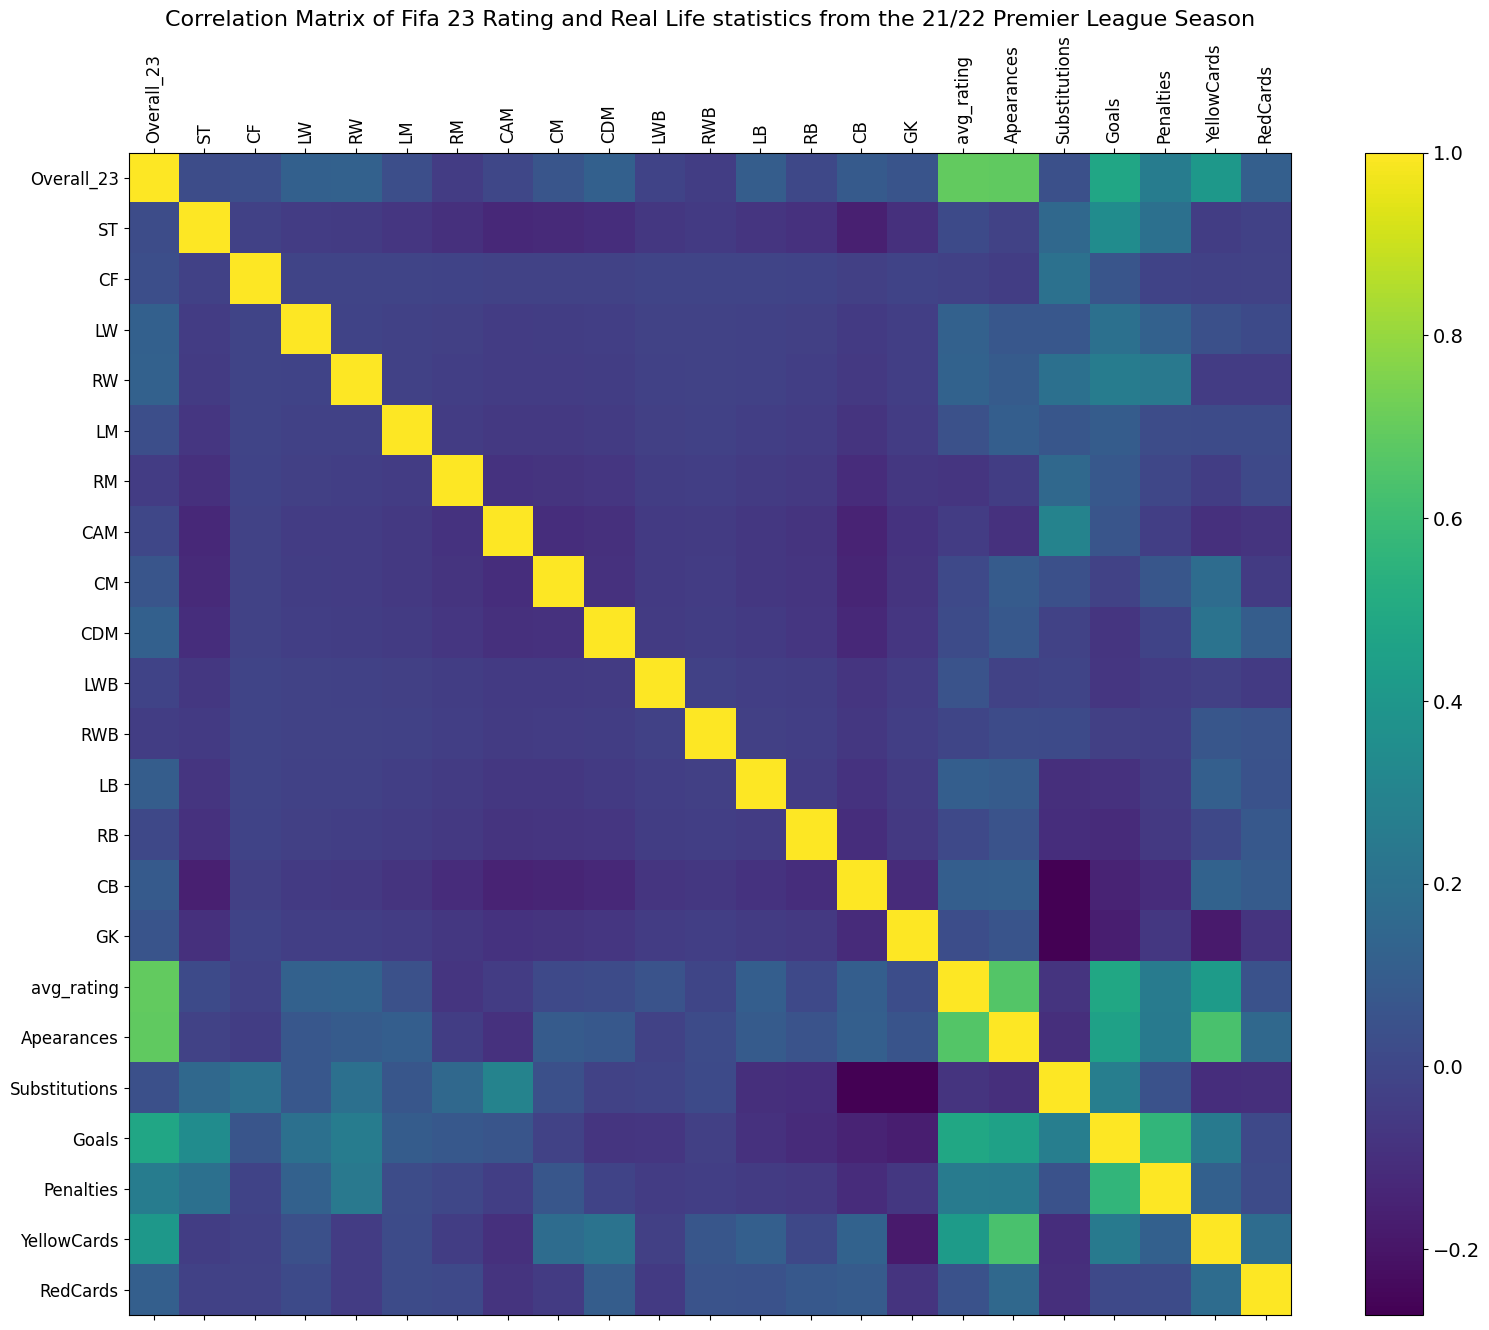

In [225]:
f = plt.figure(figsize=(19, 15))
plt.matshow(added_stats.corr(), fignum=f.number)
plt.xticks(range(added_stats.shape[1]), added_stats.columns, fontsize=12, rotation=90)
plt.yticks(range(added_stats.shape[1]), added_stats.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Fifa 23 Rating and Real Life statistics from the 21/22 Premier League Season', fontsize=16);

Okay, there's not a huge amount of correlation here.

Once again though, I feel that a lot of the relationships aren't actually particularly visible in 2d. Maybe a model would be able to capture them?

## Modelling

In [226]:
x = added_stats.drop(columns="Overall_23")
y = added_stats["Overall_23"]

print("Linear Regression:")
lin_reg(x, y)
print("Random Forest: ")
rand_forest(x, y)

Linear Regression:
MAE =  2.7231603612184943
r2 =  0.6397360079355117
RMSE = 3.544790411363948
Random Forest: 
MAE =  2.6867469879518073
r2 =  0.6323033158358058
RMSE = 3.6188928613829776


Clearly, based on the limited data available we are unable to predict a players overall rating in fifa particularly well based on real life stats. better than a coin flip, but still not great.

That being said, I want to break this down by position and see whether my prediction that we could do a better job predicting attackers than defenders holds.

We will be dealing with small subsets of an already small dataset so I dont have much hope, but lets see.

### Attackers

For this I will be classifying an attacker as a Striker, CF, Winger, Wide or Attacking midfielder.

In [233]:
attackers_2122 = added_stats[(added_stats['ST'] == True) | (added_stats['CF'] == True) | 
                             (added_stats['LW'] == True) | (added_stats['RW'] == True) |
                             (added_stats['LM'] == True) | (added_stats['RM'] == True) |
                             (added_stats['CAM'] == True)].copy()


x = attackers_2122.drop(columns=["Overall_23", "ST", "CF", "LW", "RW", "LM", "RM", "CAM", "CM", "CDM", "LWB", "RWB", "LB", "RB", "CB", "GK"])
y = attackers_2122["Overall_23"]

print("Linear Regression:")
lin_reg(x, y)
print("Random Forest: ")
rand_forest(x, y)

Linear Regression:
MAE =  2.7903584582428436
r2 =  0.5641453394534552
RMSE = 3.583300531993849
Random Forest: 
MAE =  2.533333333333333
r2 =  0.43288723996289924
RMSE = 3.777124126457412


In [234]:
attackers_2122.shape

(148, 23)

Yeah, as thought that is a measely number of datapoints, probably explaining why our model performs so poorly. 

### Defenders

For this I will be classifying defenders as CMs, CDMs, Wing Backs, Full Backs, Center Halves and Goal keepers

In [236]:
defenders_2122 = added_stats[(added_stats['CM'] == True) | (added_stats['CDM'] == True) | 
                             (added_stats['LWB'] == True) | (added_stats['RWB'] == True) |
                             (added_stats['LB'] == True) | (added_stats['RB'] == True) |
                             (added_stats['CB'] == True) | (added_stats['GK'] == True)].copy()


x = defenders_2122.drop(columns=["Overall_23", "ST", "CF", "LW", "RW", "LM", "RM", "CAM", "CM", "CDM", "LWB", "RWB", "LB", "RB", "CB", "GK"])
y = defenders_2122["Overall_23"]

print("Linear Regression:")
lin_reg(x, y)
print("Random Forest: ")
rand_forest(x, y)

Linear Regression:
MAE =  2.237770419490631
r2 =  0.48543741007273555
RMSE = 2.6717183970460074
Random Forest: 
MAE =  2.6
r2 =  0.2562111801242236
RMSE = 3.262582480864575


In [237]:
defenders_2122.shape

(223, 23)

Again, pretty awful

That being said, my prediction does hold true!

Even with less datapoints, the model is able to predict attackers' Fifa Ratings Better than those of defenders based on some real life statistics, even with less datapoints.

I'll have to retry this at some point with more datapoints, possibly obtained through web scraping, as I cannot easily find enough just now.